# Introduction to habersman survival data set

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings 
Hospital on the survival of patients who had undergone surgery for breast cancer.

Source :(https://www.kaggle.com/gilsousa/habermans-survival-data-set)

First of all for any data analysis task or for performing operation on data we should have good domain knowledge so that we can relate the data features and also can give accurate conclusion. So, I would like to explain the features of data set and how it affects other feature.

There are 4 attribute in this data set out of which 3 are features and 1 class attribute as below. Also, there are 306 instances of data.

1.Age of patient at time of operation

2.Patient's year of operation

3.Number of positive axillary nodes detected (lymph nodes)

4.Survival_status

A] Age of patient at the time of operation:

It represent the age of patient at which they undergone surgery (age from 30 to 83)

B] patient year of operation:

Year in which patient was undergone surgery(1958–1969)

C] positive axillary nodes(lymph nodes): (Source: https://www.breastcancer.org/symptoms/diagnosis/lymph_nodes)

Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)

D] survival_status: 

It represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who dead  is represented as 2.

# Objective

Our objective is to predict no of patient survive more or less than than 5 years after surgery and no of patient die after surgery.

In [15]:
#import the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [16]:
#load the habersman survival data in pandas DataFram
labels = ['Age of patient at time of operation',"Patient's year of operation",'Number of positive axillary nodes detected'
      ,'Survival_status']

survival = pd.read_csv('haberman.csv', names = labels)

survival['Survival_status'] = survival['Survival_status'].map({1:'survived', 2:'dead'})




In [17]:
survival.head()

,Age of patient at time of operation,Patient's year of operation,Number of positive axillary nodes detected,Survival_status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


In [18]:
survival.tail()

,Age of patient at time of operation,Patient's year of operation,Number of positive axillary nodes detected,Survival_status
301,75,62,1,survived
302,76,67,0,survived
303,77,65,3,survived
304,78,65,1,dead
305,83,58,2,dead


In [19]:
print(survival['Survival_status'].count())
print(survival['Survival_status'].value_counts())

306
survived    225
dead         81
Name: Survival_status, dtype: int64


total no of patient who's undergose to surgery: 306

toatal no of patient survive after surgery is:  225

and total no of patient die after surgery is:   81

In [20]:
print(survival.shape)

(306, 4)


In [21]:
survival.columns

Index(['Age of patient at time of operation', 'Patient's year of operation',
       'Number of positive axillary nodes detected', 'Survival_status'],
      dtype='object')

In [22]:
survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age of patient at time of operation           306 non-null int64
Patient's year of operation                   306 non-null int64
Number of positive axillary nodes detected    306 non-null int64
Survival_status                               306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


In [23]:
survival.describe()

,Age of patient at time of operation,Patient's year of operation,Number of positive axillary nodes detected
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


here we can calculate mean value,standar deviation,minimum value,percentile,and maximum value of each column

# 2-D Scatter plot

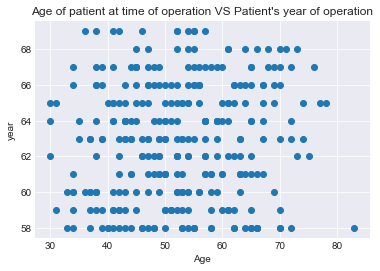

In [24]:
#2d scatter plot
plt.scatter(survival['Age of patient at time of operation'],survival["Patient's year of operation"])
plt.xlabel('Age')
plt.ylabel('year')
plt.title("Age of patient at time of operation VS Patient's year of operation")
plt.show()

1.not make a much sense about data points

2.lots of overlapping between points.

3.so we can use seaborn libery for more visullization

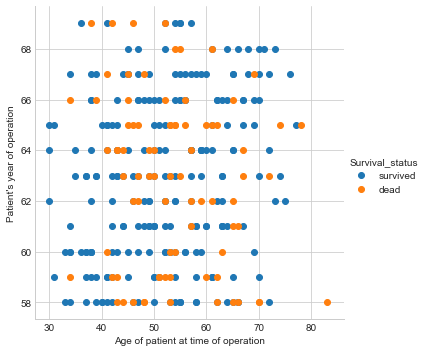

In [25]:
sns.set_style('whitegrid');
sns.FacetGrid(survival, hue = 'Survival_status', size = 5)\
   .map(plt.scatter,'Age of patient at time of operation' ,"Patient's year of operation")\
   .add_legend()
plt.show()


in above plot blue dot's are represent no of patient survive after surgery and orange dot's represent no of patient dead after 
surgery

most of the blue dot's and orange dot's are overlap to each other

for more accurate analysis we can use a pair plot that is pair of 3 features


# Pair plot

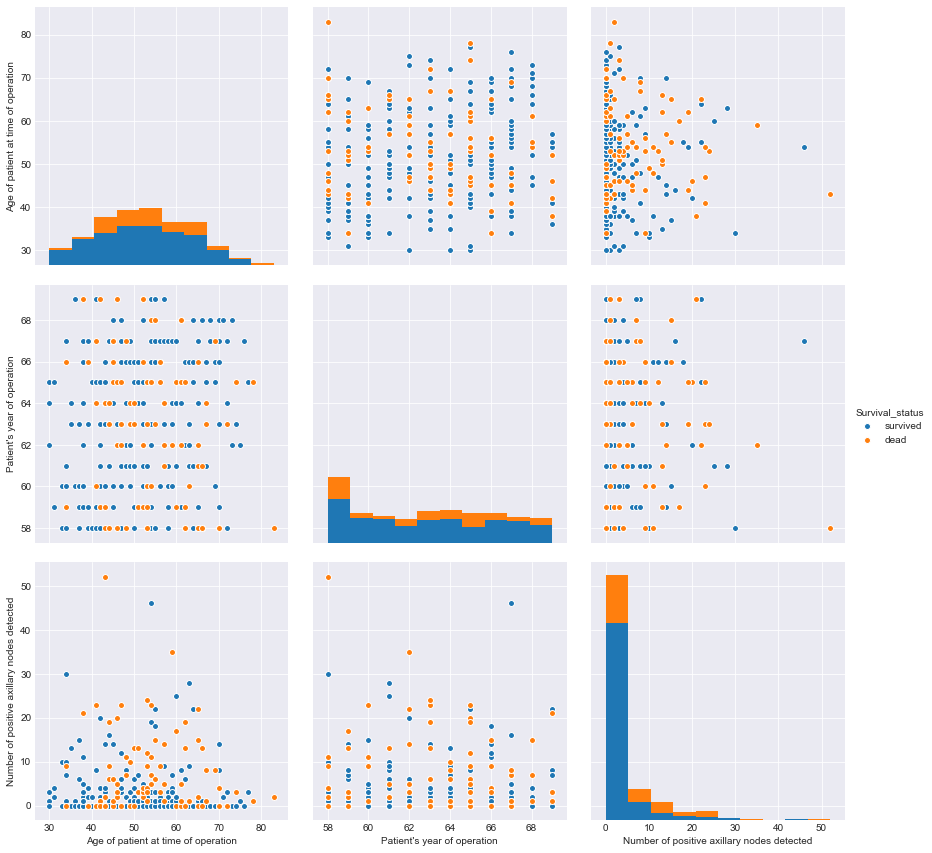

In [27]:
plt.close()
sns.set_style('darkgrid')
sns.pairplot(survival,hue = 'Survival_status' , size = 4)
plt.show()

here we can use three features for pair plot:
1.age of patient at the time of operation VS patient's year of operation 

2.age of patient at the time of operation VS number of positive axillary nodes detected

3.patient's year of operation VS number of positive axillary nodes detected


# observations

Here plot no 1,5,9 are histogram wich can be use latter.

plot no 3 and 7 are good featurs for further analysis and remaining plot's are to much overlap so we can reject it for further analysis

so we can use plot 3 and 7 that is age of the patient ate time of operation and nuber of positive axillary nodes for further analysis 

# Pdf and histogram

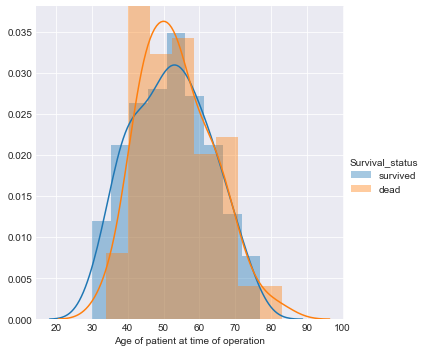

In [42]:
sns.set_style('darkgrid')
sns.FacetGrid(survival,hue = 'Survival_status', size = 5)\
   .map(sns.distplot,'Age of patient at time of operation')\
   .add_legend()
plt.show()


not make a much sense after looking to the plot they are to much overlap each other's

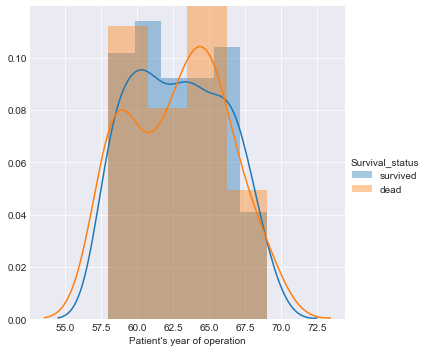

In [43]:
sns.set_style('darkgrid')
sns.FacetGrid(survival,hue = 'Survival_status', size = 5)\
   .map(sns.distplot,"Patient's year of operation")\
   .add_legend()
plt.show()

To much overlap so we can't predict about survival_status

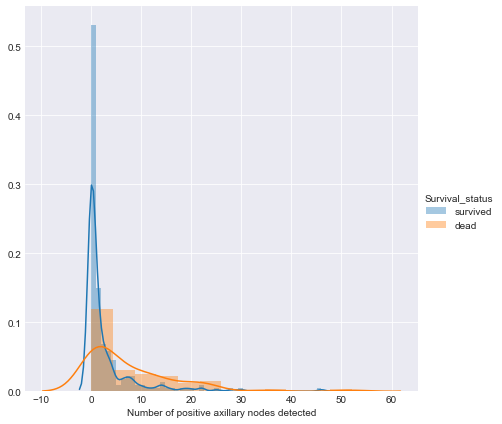

In [44]:
sns.set_style('darkgrid')
sns.FacetGrid(survival,hue = 'Survival_status', size = 6)\
   .map(sns.distplot,"Number of positive axillary nodes detected")\
   .add_legend()
plt.show()

# observation

we can use if condition for prediction:

1.if (axillary_nodes <= 0)

patient survival_status = long_survived

2.if (axillary_nodes >0) && (axillary_nodes < 3.2)

patient survival_status = chances to long survive

3.if (axillary_nodes > 3.2)

patient survival_status = almost die or less chance to survive

above two feature's are not usfull for further analysis so we can reject this two feature's.

and continue with axillary nodes feature's for further analysis



# Cdf

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


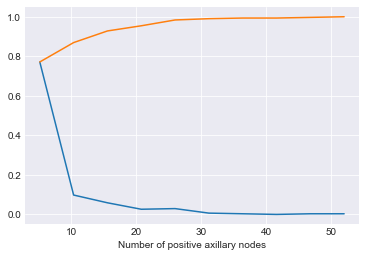

In [11]:
counts, bin_edges = np.histogram(survival["Number of positive axillary nodes detected"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Number of positive axillary nodes')
plt.show()

From above CDF you can observe that orange line shows there is a 80% chance of long survival if number of axillary nodes detected are < 5. Also you can see as number of axillary nodes increases survival chances also reduces means it is clearly observed that 80% — 85% of people have good chances of survival if they have less no of auxillary nodes detected and as nodes increases the survival status also decreases as a result 100% of people have less chances of survival if nodes increases >35

# Box plot and Whiskers

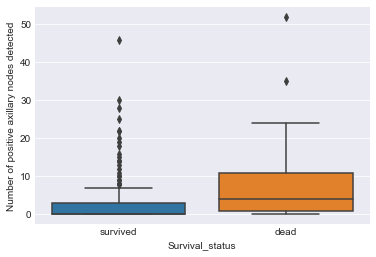

In [12]:
#IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.
#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x = 'Survival_status',y = "Number of positive axillary nodes detected",data =survival)
plt.show()

# Observation

1] box plot show that no of positive axillary node is more then the patinet will die 

2] if axial nodes are less than five(5 <) then more patient to be survived

3] if axial node is greater than (>5) then chances of very less surviving or allmost die

# violinplot

In [ ]:
 sns.violinplot(x ='Survival_status',y ="Number of positive axillary nodes detected",data = survival ,size = 10 )
plt.show()

# Observation

1] A violin plot combines the benefits of the previous two plots 

2] more no of patient survive if there axis node is less equal to zero (0<=)

3] more patient wil be die if there axil node is greater than or equal to one (>=1)

# conclusion

Hence we can conclude that using the three feature's such as Age, year of operaton ,and axil_node we can predict the result 
such that total no of patient will be die after surgery and total no of patient wii be survive after surgery

# Refrences

https://www.kaggle.com/gilsousa/habermans-survival-data-set

https://www.appliedaicourse.com/

https://www.breastcancer.org/symptoms/diagnosis/lymph_nodes